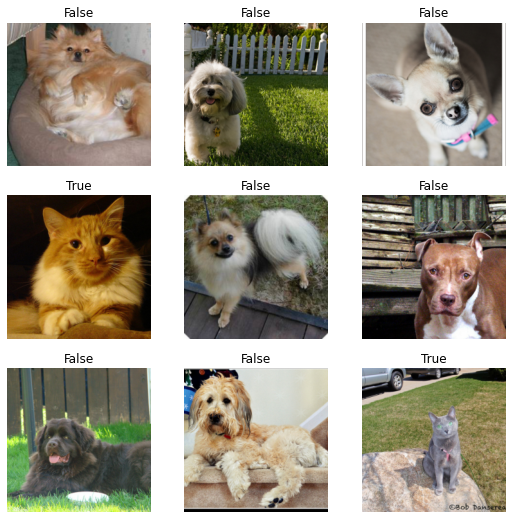

In [15]:
from fastai.vision.all import *

#get files from the url and get images folder
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

#uppercase for cats, lowercase is for dogs
def label_func(f): return f[0].isupper()

dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

#true for cat, false if for dog
dls.show_batch()

In [6]:
#resnet34 pretrained on ImageNet
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.145058,0.024499,0.009472,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.045798,0.012114,0.004060,00:19


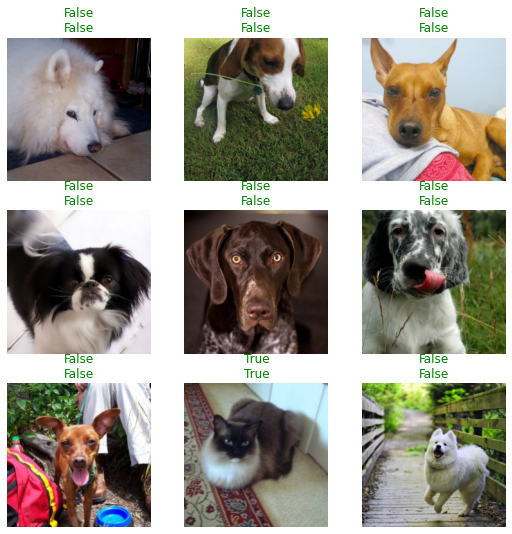

In [7]:
learn.show_results()

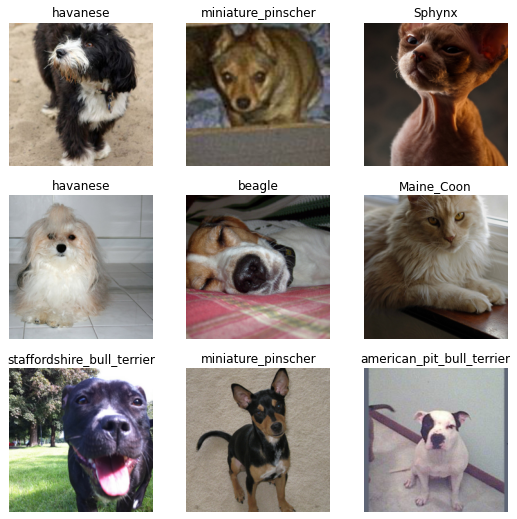

In [12]:
#classyfing breeds according to files' e.g. 'yorkshire_terrier_187.jpg'
pat = r'^(.*)_\d+.jpg'

dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))
dls.show_batch()

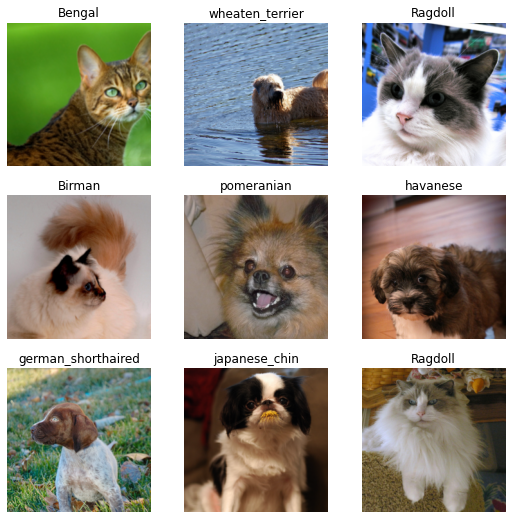

In [21]:
#larger resize because of differantiating breed. previous is 224
#
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

dls.show_batch()

In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.299625,0.290018,0.094046,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.454615,0.358872,0.108254,00:23
1,0.411831,0.296452,0.092016,00:23
2,0.239213,0.241438,0.066306,00:23
3,0.138602,0.213624,0.063599,00:23
